In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.decomposition import PCA
from sklearn import preprocessing
# source: https://www.dr.dk/nyheder/politik/kv17/kandidat-testen

In [2]:
df = pd.read_csv('..//data//kv17_candidate_answers+meta.csv')

In [3]:
set(df['partyName'])

{'Alternativet',
 'Anne Grønlund',
 'Betina Baden',
 'Blovstrød Listen',
 'Borgerliberale i Greve',
 'Borgerlisten ',
 'Borgerlisten Nyborg',
 'Borgerlisten Stevns',
 'Dansk Folkeparti',
 'Demokratisk Balance',
 'Det Konservative Folkeparti',
 'Enhedslisten - De Rød-Grønne',
 'Fjordlisten',
 'Fjorlisten',
 'Frit Danmark – Folkebevægelsen Mod Indvandringen',
 'Fusion Randers',
 'Kommunelisten Viborg',
 'Kommunisterne',
 'Lavere Skatter og Afgifter',
 'Liberal Alliance',
 'Lokaldemokraterne',
 'Lokallisten - hele Holbæk kommune',
 'Maren Spliid Gruppen',
 'Miljø- og velfærdslisten',
 'Nye Borgerlige',
 'Odsherred Listen',
 'Radikale Venstre',
 'Robin Hood Partiet',
 'Rungsted Listen',
 'SF - Socialistisk Folkeparti',
 'Slesvigsk Parti',
 'Socialdemokratiet',
 'Tryghedslisten',
 'Tværpolitisk Forening',
 'Venstre, Danmarks Liberale Parti',
 'Vores Allerød',
 'nytgribskov'}

In [4]:
relevant_parties = {0:'Alternativet', 
                    1:'Dansk Folkeparti', 
                    2:'Det Konservative Folkeparti', 
                    3:'Enhedslisten - De Rød-Grønne', 
                    4:'Liberal Alliance',
                    5:'Nye Borgerlige',
                    6:'Radikale Venstre',
                    7:'SF - Socialistisk Folkeparti',
                    8:'Socialdemokratiet',
                    9:'Venstre, Danmarks Liberale Parti'}

In [5]:
for k, v in relevant_parties.items():
    print(v)

Alternativet
Dansk Folkeparti
Det Konservative Folkeparti
Enhedslisten - De Rød-Grønne
Liberal Alliance
Nye Borgerlige
Radikale Venstre
SF - Socialistisk Folkeparti
Socialdemokratiet
Venstre, Danmarks Liberale Parti


In [6]:
def calc_relevant_party_key(x, party_dict):
    
    party_key = -5
    
    for k, v in party_dict.items():
        if v == x:
            party_key = k
        
    return party_key
    

df['partyKey'] = df.apply(lambda row: calc_relevant_party_key(row['partyName'], relevant_parties), axis=1)

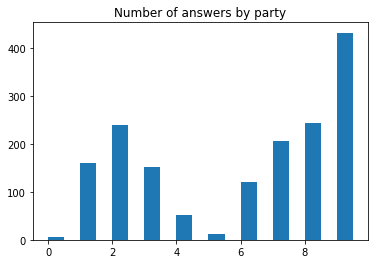

In [7]:
f, ax = plt.subplots(1,1)

ax.hist(df['partyKey'].dropna(), bins = [i*0.5 for i in range(20)])
ax.set_title("Number of answers by party")
f.savefig('..//figs//response_variable_distribution.png')

In [8]:
# plt.hist(df['partyName'].dropna(), bins = [i for i in range(10)])

In [9]:
df.groupby(by=df['partyName']).count()

,answerString,constituency,constituency_id,constituency_slug,firstName,id,isPartyLeader,lastName,partyLetter,partyName,...,name,link,constituencies,causes,cv,Beskæftigelse,Alder,Uddannelse,Valgt i,partyKey
partyName,,,,,,,,,,,,,,,,,,,,,
Alternativet,6,6,6,6,6,6,6,6,6,6,...,6,6,6,5,6,6,6,5,4,6
Anne Grønlund,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Betina Baden,1,1,1,1,1,1,1,1,0,1,...,1,1,1,0,1,1,0,0,0,1
Blovstrød Listen,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1
Borgerliberale i Greve,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Borgerlisten,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1
Borgerlisten Nyborg,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1
Borgerlisten Stevns,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0,1,1,0,0,0,1
Dansk Folkeparti,160,160,160,160,160,160,160,160,160,160,...,160,160,160,105,160,160,104,110,39,160


In [10]:
def string_len(x):
    
    return len(str(x))
df['answer_str_len'] = df.apply(lambda row: string_len(row['answerString']), axis=1)


In [11]:
df.shape

(1710, 23)

In [12]:
df = df.loc[(df['partyKey'] > -1) & (df['answer_str_len'] == 15)]
df = df.reset_index()    

In [13]:
df = df.filter(['partyKey', 'partyName', 'answerString'])

In [14]:
def to_answer(answer_string, answer_nr):
    answer_string = str(answer_string)    
    answer = answer_string[answer_nr]
    return int(answer)



In [15]:
for i in range(15):
    df['q{}'.format(i)] = df.apply(lambda row: to_answer(row['answerString'], i), axis = 1)

In [16]:
party_names = df['partyName'] 

In [17]:
df.shape

(1215, 18)

In [18]:
# df.drop(['B', 'C'], axis=1)
df = df.drop(['partyName','answerString'],axis=1)
df.to_csv('..//data//clean_kv17.csv')

In [19]:
questions = {1 : ['ÆLDREPLEJE', 'Private virksomheder bør stå for en større del af hjemmehjælpen til ældre'],
             2 : ['FRIVILLIGHED', 'Kommunen skal inddrage frivilligt arbejde på plejehjem for at aflaste personalet'],
             3 : ['KOMMUNESKAT', 'Kommuneskatten skal sænkes'],
             4 : ['ØKONOMI', 'Det er muligt at spare penge i kommunen uden at det går ud over velfærden'],
             5 : ['FOLKESKOLE', 'Kommunen skal sikre, at folkeskoleklasserne er bredt socialt sammensatte'],
             6 : ['DAGINSTITUTIONER', 'Der skal være en fast grænse for, hvor mange børn der må være pr pædagog i børnehaver og vuggestuer'],
             7 : ['TRANSPORT', 'Kommunen skal bruge flere penge på cykelstier'],
             8 : ['FLYGTNINGE', 'Kommunen kan modtage flere flygtninge'],
             9 : ['INTEGRATION', 'Kommunale institutioner tager for mange hensyn til religiøse minoriteter'],
             10 : ['KULTUR', 'Der anvendes for mange penge på biblioteker og kulturhuse'],
             11 : ['ÆLDRE', 'Ældre der har råd, skal kunne tilvælge og betale for ekstra service på de kommunale plejehjem'],
             12 : ['MILJØ', 'Kommunen skal sikre mere sortering og genanvendelse af borgernes affald'],
             13 : ['BESKÆFTIGELSE', 'Kommunen skal stille større krav til arbejdsløse'],
             14 : ['FOLKESKOLE' , 'Børn går for mange timer i skole'],
             15 : ['BÆREDYGTIGHED' , 'Der bør kun serveres økologisk mad i offentlige madordninger']}

In [20]:
df_no_y = df.drop(['partyKey'],axis=1)
norm = preprocessing.Normalizer()
df_normalized = norm.fit_transform(df_no_y)

pca = PCA(n_components=2)
S = pca.fit_transform(X = df_normalized)

/Users/Jeppe/anaconda3/envs/seahorse/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the normalize function.
  warnings.warn(msg, _DataConversionWarning)


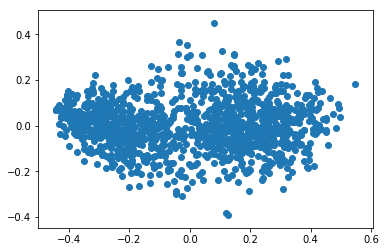

In [21]:
df_plot = pd.DataFrame(S, index = party_names)
plt.scatter(df_plot[0], df_plot[1])

In [22]:
df_plot

,0,1
partyName,,
Socialdemokratiet,0.040673,-0.007572
Socialdemokratiet,0.054744,0.053090
Socialdemokratiet,-0.009452,0.059538
Socialdemokratiet,-0.128686,-0.041593
Socialdemokratiet,0.000158,0.310414
Socialdemokratiet,0.052335,-0.023760
Socialdemokratiet,-0.092438,0.052766
Radikale Venstre,-0.200015,-0.007721
Det Konservative Folkeparti,0.286967,-0.023737


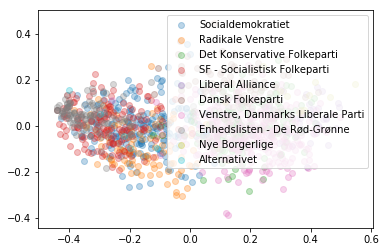

In [23]:
for i in df_plot.index.unique():
    temp_df = df_plot.loc[df_plot.index == i]
    plt.scatter(temp_df[0], temp_df[1], alpha=0.3, label=i)
    
plt.legend()

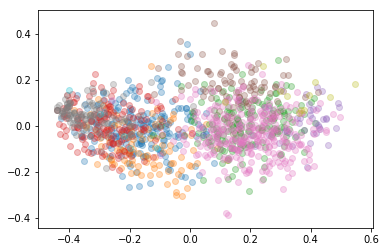

In [24]:
for i in df_plot.index.unique():
    temp_df = df_plot.loc[df_plot.index == i]
    plt.scatter(temp_df[0], temp_df[1], alpha=0.3, label=i)


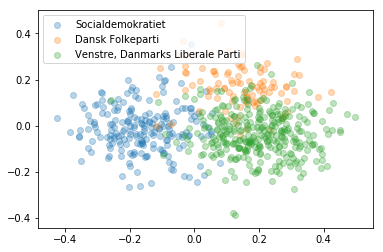

In [25]:
for i in df_plot.index.unique():
    if i in ['Venstre, Danmarks Liberale Parti', 'Socialdemokratiet', 'Dansk Folkeparti']:
        temp_df = df_plot.loc[df_plot.index == i]
        plt.scatter(temp_df[0], temp_df[1], alpha=0.3, label=i)

plt.legend()

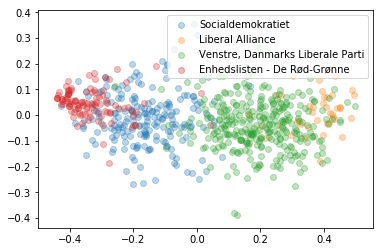

In [26]:
for i in df_plot.index.unique():
    if i in ['Venstre, Danmarks Liberale Parti', 'Socialdemokratiet', 'Enhedslisten - De Rød-Grønne', 'Liberal Alliance']:
        temp_df = df_plot.loc[df_plot.index == i]
        plt.scatter(temp_df[0], temp_df[1], alpha=0.3, label=i)

plt.legend()

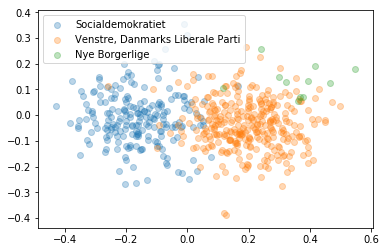

In [27]:
for i in df_plot.index.unique():
    if i in ['Venstre, Danmarks Liberale Parti', 'Socialdemokratiet', 'Nye Borgerlige']:
        temp_df = df_plot.loc[df_plot.index == i]
        plt.scatter(temp_df[0], temp_df[1], alpha=0.3, label=i)

plt.legend()

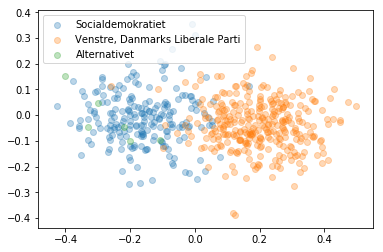

In [28]:
for i in df_plot.index.unique():
    if i in ['Venstre, Danmarks Liberale Parti', 'Socialdemokratiet', 'Alternativet']:
        temp_df = df_plot.loc[df_plot.index == i]
        plt.scatter(temp_df[0], temp_df[1], alpha=0.3, label=i)

plt.legend()

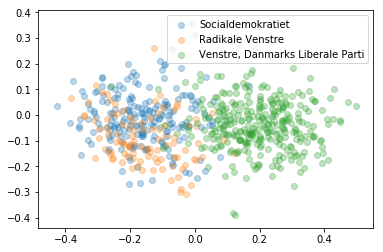

In [29]:
for i in df_plot.index.unique():
    if i in ['Venstre, Danmarks Liberale Parti', 'Socialdemokratiet', 'Radikale Venstre']:
        temp_df = df_plot.loc[df_plot.index == i]
        plt.scatter(temp_df[0], temp_df[1], alpha=0.3, label=i)

plt.legend()

# Histograms of each question:

In [30]:
df

,partyKey,q0,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14
0,8,1,1,4,4,4,2,5,1,1,1,4,4,4,4,4
1,8,1,3,4,2,5,4,2,3,3,2,1,1,3,2,2
2,8,1,2,1,3,5,3,3,1,1,3,4,3,2,5,2
3,8,1,4,1,2,5,5,3,3,1,2,4,2,3,4,4
4,8,1,2,3,1,2,4,3,1,4,2,2,4,4,5,4
5,8,3,5,1,3,1,1,5,3,3,3,4,5,3,5,4
6,8,1,3,2,3,5,5,4,3,3,3,4,5,4,4,5
7,6,1,4,2,4,5,5,5,5,2,2,2,5,2,5,4
8,2,3,3,5,5,4,2,4,1,2,4,5,3,5,4,3
9,2,4,1,5,5,5,4,4,2,3,3,5,3,5,5,3


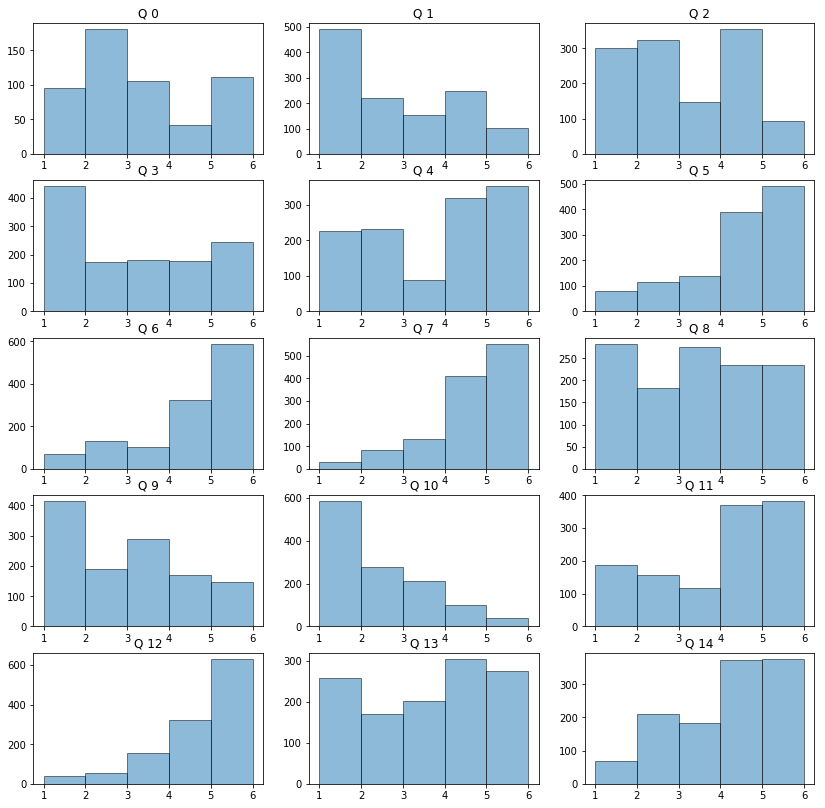

In [39]:
def get_cols_for_plot(row, col):
    
    col_index = 3*row + col
    return col_index


def marginal_hist_plotter(rows, cols, df):
    fig, axes = plt.subplots(rows,cols, figsize=(14,14))
    _bins = [1,2,3,4,5,6]
    
    for col in range(cols):
        for row in range(rows):
            
            col_index = get_cols_for_plot(row, col)
            col_name = df.columns[col_index]
            
            data = df[col_name]
            
            axes[row][col].hist(data, bins= _bins, alpha=0.5,edgecolor='black')
            axes[row][col].set_title('Q {}'.format(col_index))
    
    fig.savefig('..//figs//marginal_histograms.png')
            
marginal_hist_plotter(5,3, df)